In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
batting_2018 = pd.read_csv("Resources/2018/2018batting.csv")
fielding_2018 = pd.read_csv("Resources/2018/2018fielding.csv")
pitching_2018 = pd.read_csv("Resources/2018/2018pitching.csv")

In [3]:
batfield_2018 = pd.merge(batting_2018, fielding_2018, on='Tm')

full_2018 = pd.merge(batfield_2018, pitching_2018, on='Tm')

full_2018

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y
0,Arizona Diamondbacks,49,29.2,4.28,162,6157,5460,693,1283,259,...,6139,113,3.91,1.254,8.1,1.1,3.2,8.9,2.77,1106
1,Atlanta Braves,58,27.3,4.69,162,6251,5582,759,1433,314,...,6155,110,3.98,1.284,7.6,0.9,3.9,8.8,2.24,1128
2,Baltimore Orioles,56,28.4,3.84,162,6034,5507,622,1317,242,...,6340,83,4.98,1.496,9.8,1.5,3.7,7.6,2.04,1155
3,Boston Red Sox,44,27.7,5.41,162,6302,5623,876,1509,355,...,6166,118,3.82,1.246,8.1,1.1,3.2,9.6,3.04,1143
4,Chicago Cubs,50,27.2,4.67,163,6369,5624,761,1453,286,...,6264,115,4.13,1.315,8.0,1.0,3.8,8.1,2.14,1190
5,Chicago White Sox,51,26.5,4.05,162,6071,5523,656,1332,259,...,6339,88,4.73,1.431,8.8,1.2,4.1,7.9,1.93,1180
6,Cincinnati Reds,53,27.2,4.30,162,6240,5532,696,1404,251,...,6279,90,4.66,1.404,9.3,1.4,3.3,7.9,2.36,1137
7,Cleveland Indians,49,29.4,5.05,162,6300,5595,818,1447,297,...,6071,115,3.78,1.205,8.3,1.2,2.5,9.5,3.79,1051
8,Colorado Rockies,41,28.7,4.79,163,6178,5541,780,1418,280,...,6154,109,4.06,1.310,8.5,1.1,3.3,8.7,2.68,1052
9,Detroit Tigers,49,27.9,3.89,162,6029,5494,630,1326,284,...,6130,98,4.58,1.343,9.0,1.4,3.1,7.7,2.47,1058


In [22]:
# Find the top 10 values in column 'A'
Playoff_Teams_2018 = ['Chicago Cubs', 'Colorado Rockies', 'Oakland Athletics', 'New York Yankees','Los Angeles Dodgers', 'Atlanta Braves','Milwaukee Brewers', 'Houston Astros', 'Cleveland Indians','Boston Red Sox']
Playoff_Teams_2018_df = full_2018[full_2018['Tm'].isin(Playoff_Teams_2018)]

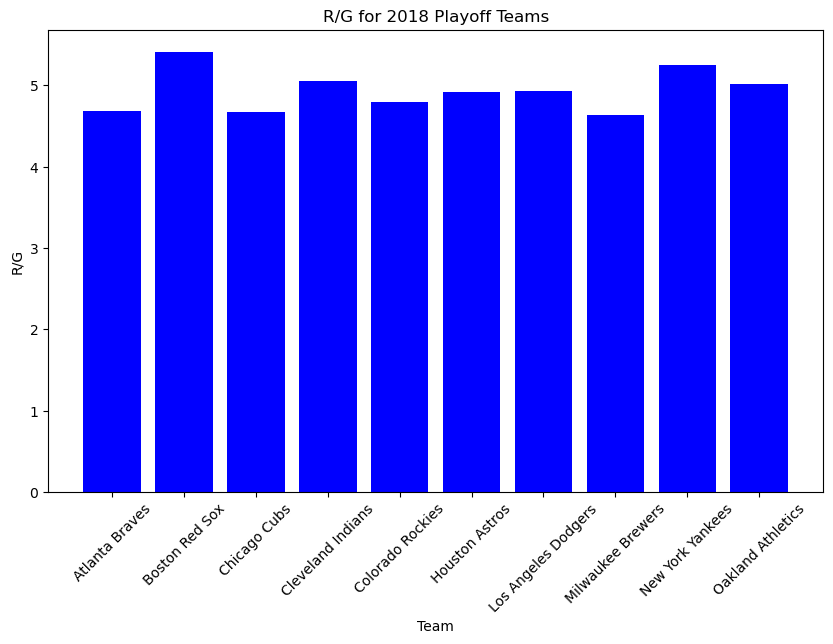

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(Playoff_Teams_2018_df['Tm'], Playoff_Teams_2018_df['R/G'], color='blue')
plt.xlabel('Team')
plt.ylabel('R/G')
plt.title('R/G for 2018 Playoff Teams')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.show()

In [26]:
columns = Playoff_Teams_2018_df.columns.tolist()
print(columns)

['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B', '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x', '#Fld', 'RA/G_x', 'DefEff', 'G_y', 'GS_x', 'CG_x', 'Inn', 'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rdrs', 'Rdrs/yr', 'Rgood', '#P', 'PAge', 'RA/G_y', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS_y', 'GF', 'CG_y', 'tSho', 'cSho', 'SV', 'IP', 'H_y', 'R_y', 'ER', 'HR_y', 'BB_y', 'IBB_y', 'SO_y', 'HBP_y', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'LOB_y']


In [37]:
columns_to_keep = ['Tm', 'R/G','R_x', 'H_x', 'HR_x', 'RBI', 'SB', 'BB_x', 'OBP', 'SLG', 'LOB_x', 'RA/G_x', 'DefEff', 'E', 'Fld%', 'RA/G_y', 'W', 'L', 'W-L%', 'ERA', 'tSho', 'SV', 'H_y', 'ER','HR_y', 'BB_y', 'IBB_y', 'SO_y', 'HBP_y', 'BK', 'WP','WHIP']
Playoff_Teams_2018_Clean = Playoff_Teams_2018_df[columns_to_keep]

In [38]:
Playoff_Teams_2018_Clean

,Tm,R/G,R_x,H_x,HR_x,RBI,SB,BB_x,OBP,SLG,...,H_y,ER,HR_y,BB_y,IBB_y,SO_y,HBP_y,BK,WP,WHIP
1,Atlanta Braves,4.69,759,1433,175,717,90,511,0.324,0.417,...,1236,607,153,635,43,1423,52,8,61,1.284
3,Boston Red Sox,5.41,876,1509,208,829,125,569,0.339,0.453,...,1305,608,176,512,8,1558,84,3,51,1.246
4,Chicago Cubs,4.67,761,1453,167,722,66,576,0.333,0.410,...,1319,598,157,622,33,1333,66,3,46,1.315
7,Cleveland Indians,5.05,818,1447,216,786,135,554,0.332,0.434,...,1349,611,200,407,29,1544,59,2,54,1.205
8,Colorado Rockies,4.79,780,1418,210,748,95,507,0.322,0.435,...,1377,699,184,525,24,1409,52,8,70,1.310
10,Houston Astros,4.92,797,1390,205,763,71,565,0.329,0.425,...,1164,503,152,435,4,1687,66,4,67,1.099
13,Los Angeles Dodgers,4.93,804,1394,235,756,75,647,0.333,0.442,...,1279,554,179,422,39,1565,61,10,39,1.152
15,Milwaukee Brewers,4.63,754,1398,218,711,124,537,0.323,0.424,...,1259,606,173,553,34,1428,61,5,50,1.240
18,New York Yankees,5.25,851,1374,267,821,63,625,0.329,0.451,...,1311,611,177,494,9,1634,58,4,73,1.239
19,Oakland Athletics,5.02,813,1407,227,778,35,550,0.325,0.439,...,1303,621,184,474,19,1237,53,2,86,1.212
